# Building a model to predict volume sold(Gallons)

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import iplot
import datetime
import warnings

In [2]:
# Ignore warnings 
warnings.filterwarnings('ignore')

In [3]:
# Reading cleaned CSV file from analysis jupyter notebook
df=pd.read_csv("cleaned_Iowa_Liquor_Sales.csv")
df.head(5)

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,County,Category,Category Name,...,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Profit (Dollars),date_without_time,month
0,INV-46142600002,04/03/2022,3842,BANCROFT LIQUOR STORE,107 N PORTLAND ST PO BX 222,BANCROFT,50517.0,KOSSUTH,1081200,CREAM LIQUEURS,...,1000,17.00,25.50,6,153.00,6.0,1.58,51.00,2022-04-03,Apr
1,INV-46142600006,04/03/2022,3842,BANCROFT LIQUOR STORE,107 N PORTLAND ST PO BX 222,BANCROFT,50517.0,KOSSUTH,1031100,AMERICAN VODKAS,...,1000,13.17,19.76,24,474.24,24.0,6.34,158.16,2022-04-03,Apr
2,INV-46142100001,04/03/2022,5941,PRIME MART - CEDAR FALLS,2728 CENTER ST,CEDAR FALLS,50613.0,BLACK HAWK,1012200,SCOTCH WHISKIES,...,750,150.00,225.00,2,450.00,1.5,0.39,150.00,2022-04-03,Apr
3,INV-46142400009,04/03/2022,4129,CYCLONE LIQUORS,626 LINCOLN WAY,AMES,50010.0,STORY,1032100,IMPORTED VODKAS,...,1000,15.16,22.74,60,1364.40,60.0,15.85,454.80,2022-04-03,Apr
4,INV-46142400014,04/03/2022,4129,CYCLONE LIQUORS,626 LINCOLN WAY,AMES,50010.0,STORY,1041100,AMERICAN DRY GINS,...,1000,7.33,11.00,4,44.00,4.0,1.05,14.68,2022-04-03,Apr


In [4]:
# Getting info of cleaned data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320163 entries, 0 to 1320162
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Invoice/Item Number    1320163 non-null  object 
 1   Date                   1320163 non-null  object 
 2   Store Number           1320163 non-null  int64  
 3   Store Name             1320163 non-null  object 
 4   Address                1320163 non-null  object 
 5   City                   1320163 non-null  object 
 6   Zip Code               1320163 non-null  float64
 7   County                 1320163 non-null  object 
 8   Category               1320163 non-null  int64  
 9   Category Name          1320163 non-null  object 
 10  Vendor Number          1320163 non-null  int64  
 11  Vendor Name            1320163 non-null  object 
 12  Item Number            1320163 non-null  int64  
 13  Item Description       1320163 non-null  object 
 14  Pack              

In [5]:
# Droping unnecessary columns
df.drop(['Invoice/Item Number','Date','Store Number','Address','City','Zip Code','County','Category','Vendor Number','Item Number','Item Description','date_without_time','month','Volume Sold (Liters)','Store Name'],axis=1,inplace=True)

In [6]:
# checking whether the columns are dropped or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320163 entries, 0 to 1320162
Data columns (total 10 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Category Name          1320163 non-null  object 
 1   Vendor Name            1320163 non-null  object 
 2   Pack                   1320163 non-null  int64  
 3   Bottle Volume (ml)     1320163 non-null  int64  
 4   State Bottle Cost      1320163 non-null  float64
 5   State Bottle Retail    1320163 non-null  float64
 6   Bottles Sold           1320163 non-null  int64  
 7   Sale (Dollars)         1320163 non-null  float64
 8   Volume Sold (Gallons)  1320163 non-null  float64
 9   Profit (Dollars)       1320163 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 100.7+ MB


## Applying One Hot Encoding

In [7]:
# Getting dummies for categorical features (applying one hot encoding)
df=pd.get_dummies(df, prefix=['Category Name', 'Vendor Name'])

In [8]:
# To know shape of the dataframe
df.shape

(1320163, 270)

In [9]:
# Seperating dependent and independent variables 
y1=df['Volume Sold (Gallons)']
y2=df['Sale (Dollars)']
y3=df['Profit (Dollars)']
df.drop(['Volume Sold (Gallons)','Sale (Dollars)','Profit (Dollars)'],axis=1,inplace=True)
# df.drop(['Volume Sold (Gallons)'],axis=1,inplace=True)
X=df

## Scaling and Dimensionality reduction technique

In [10]:
# Importing libraries
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

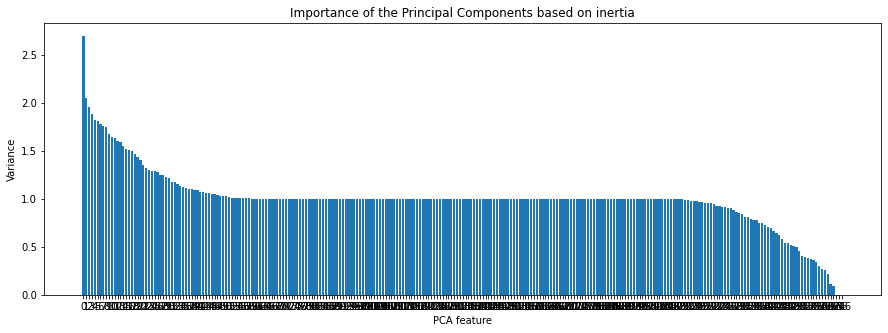

In [11]:
# Standardize/scale the dataset and apply PCA
# Extract the names of the numerical columns
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler,pca)
pipeline.fit(X)
# Plot the principal components against their inertia
features = range(pca.n_components_)
_ = plt.figure(figsize=(15, 5))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xlabel('PCA feature')
_ = plt.ylabel('Variance')
_ = plt.xticks(features)
_ = plt.title("Importance of the Principal Components based on inertia")
plt.show()

In [12]:
# Applying column transform to apply scalling technique to selected columns
ct = make_column_transformer( 
          (make_pipeline(KNNImputer(), StandardScaler()),
          ["Pack","Bottle Volume (ml)","State Bottle Cost","State Bottle Retail","Bottles Sold"]),remainder="passthrough"
      )
X = ct.fit_transform(X)
# Applying dimensionality reduction technique (PCA) to reduce columns
pca = PCA(n_components=0.85)
X = pca.fit_transform(X)
# Shape of data frame after applying PCA
print(X.shape)
print("Total number of components after applying PCA",len(pca.components_))

(1320163, 12)
Total number of components after applying PCA 12


## Train,Test and validation split

In [13]:
# Spliting the dataset into train, test and validation dataset
from sklearn.model_selection import train_test_split
X_train, X_rem, y1_train, y1_rem = train_test_split(X,y1, train_size=0.7,random_state=20)
X_valid, X_test, y1_valid, y1_test = train_test_split(X_rem,y1_rem, test_size=0.5,random_state=20)

## Modeling

In [14]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [15]:
# Importing librarues
from sklearn.linear_model import (LinearRegression, ElasticNetCV, RidgeCV)
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
import xgboost

In [16]:
# Collecting the different type of estimators to select best regression model
estimators = {
    "lr": LinearRegression(),
    "lassocv":LassoCV(),
    "ridge":RidgeCV(alphas=np.logspace(-3,1,100)),
    "elastic": ElasticNetCV(alphas=np.logspace(-3,2,100),l1_ratio=[.1, .5, .7, .9, .95, .99, 1]),
}

In [17]:
# Finding r2 score for all model by applying cross validation 
cv_results = {}
for nm, est in estimators.items():
  print(nm)
  cv_results[nm] = cross_validate(est, X_train, y1_train,scoring=('r2'), return_estimator=True, cv=10,verbose=2)

lr


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s
lassocv


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   5.9s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s remaining:    0.0s


[CV] END .................................................... total time=   5.8s
[CV] END .................................................... total time=   5.7s
[CV] END .................................................... total time=   5.6s
[CV] END .................................................... total time=   5.7s
[CV] END .................................................... total time=   5.5s
[CV] END .................................................... total time=   5.6s
[CV] END .................................................... total time=   5.6s
[CV] END .................................................... total time=   5.6s
[CV] END .................................................... total time=   5.6s
ridge


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   57.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  13.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.6s remaining:    0.0s


[CV] END .................................................... total time=  14.0s
[CV] END .................................................... total time=  14.0s
[CV] END .................................................... total time=  14.2s
[CV] END .................................................... total time=  14.6s
[CV] END .................................................... total time=  14.9s
[CV] END .................................................... total time=  15.0s
[CV] END .................................................... total time=  13.5s
[CV] END .................................................... total time=  13.5s
[CV] END .................................................... total time=  14.1s
elastic


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  42.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   42.7s remaining:    0.0s


[CV] END .................................................... total time=  43.0s
[CV] END .................................................... total time=  42.9s
[CV] END .................................................... total time=  43.6s
[CV] END .................................................... total time=  41.8s
[CV] END .................................................... total time=  44.3s
[CV] END .................................................... total time=  46.8s
[CV] END .................................................... total time=  43.2s
[CV] END .................................................... total time=  43.7s
[CV] END .................................................... total time=  44.7s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  7.3min finished


In [18]:
# Getting mean of all test scores in cross validation
{nm: np.mean(scr["test_score"]) for nm, scr in cv_results.items()}

{'lr': 0.7902930230102471,
 'lassocv': 0.7902663703203658,
 'ridge': 0.7902931420690342,
 'elastic': 0.7902961826218478}

In [19]:
# Predicting the target value for test data set
y1_pred = cross_val_predict(estimators['lr'],  X_test, y1_test)

<AxesSubplot:xlabel='Volume Sold (Gallons)', ylabel='Density'>

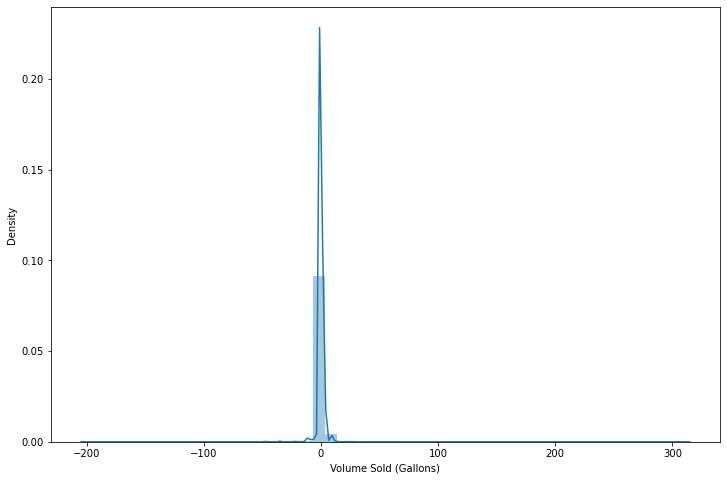

In [22]:
# Ploting the histogram residual plot for test data
import seaborn as sns
fig,ax=plt.subplots(figsize=(12,8))
delta_y1 = y1_test - y1_pred
sns.distplot(delta_y1)

In [23]:
# Performing  linear regression model 
rmod = LinearRegression()
rmod.fit(X_train, y1_train)
y_pred = rmod.predict(X_train)

In [24]:
# Finding r2 score for train, test and validation datasets 
from sklearn.metrics import r2_score
print("Train r2 score :",r2_score(y1_train,y_pred))
y_pred1 = rmod.predict(X_test)
from sklearn.metrics import r2_score
print("Test r2 score :",r2_score(y1_test,y_pred1))
y_pred2 = rmod.predict(X_valid)
from sklearn.metrics import r2_score
print("validation set r2 score :",r2_score(y1_valid,y_pred2))

Train r2 score : 0.7917671671939507
Test r2 score : 0.7653453883492386
validation set r2 score : 0.8224506088313659


In [25]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

### Hyper parameter tunning for Xgboost Regressor

In [30]:
# Finding the best hyperparameter for Xgboost regressor using Gride Search CV
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        
                'learning_rate': [0.01, 0.1],
                'max_depth': [3, 5, 7, 10],
                'min_child_weight': [1, 3, 5],
                'subsample': [0.5, 0.7],
                'colsample_bytree': [0.5, 0.7],
                'n_estimators' : [100, 200, 500],
                'objective': ['reg:squarederror']
        }

    xgb_model = XGBRegressor()

    hyper_tuning_xgb = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'r2',
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1)

    hyper_tuning_xgb.fit(X_train,y_train)

    return hyper_tuning_xgb.best_params_

In [31]:
from sklearn.model_selection import GridSearchCV
hyperParameterTuning(X_train[:3000,:], y1_train[:3000])

Fitting 2 folds for each of 288 candidates, totalling 576 fits


{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.5}

### Hyper parameter tunning for Random Forest Regressor

In [32]:
# Finding the best hyperparameter for random forest regressor using randomized Search CV
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {
                'n_estimators': n_estimators,'max_features': max_features,
               'max_depth': max_depth,'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
              }

In [33]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

In [34]:
from sklearn.model_selection import RandomizedSearchCV
hyper_tuning_rf = RandomizedSearchCV(estimator = rf_model,param_distributions = random_grid,
               n_iter = 100, cv = 2, verbose=2, random_state=35, n_jobs = -1)

In [35]:
# Fitting the parameter into tunning model
hyper_tuning_rf.fit(X_train[:3000,:], y1_train[:3000])

Fitting 2 folds for each of 100 candidates, totalling 200 fits


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [36]:
print ('Random grid: ', hyper_tuning_rf, '\n')
# print the best parameters
print ('Best Parameters: ', hyper_tuning_rf.best_params_, ' \n')

Random grid:  RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2) 

Best Parameters:  {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': False}  



### Finding best model Among clasification Regressors

In [37]:
# Applying the classification regressors to find any model perform better than normal regressors
cls_estimators = {
    
    "Dtr": DecisionTreeRegressor( max_depth= None, max_features = 'auto', max_leaf_nodes = None,
                                 splitter = 'best'),
    "xgb":XGBRegressor(n_estimators=500, objective="reg:squarederror",max_depth=5,
                       learning_rate=0.1,min_child_weight=5,subsample=0.5,
                       reg_lambda=3),  
    "RFR": RandomForestRegressor(n_estimators= 5, min_samples_split=10,
                                 min_samples_leaf= 1,max_features= 'auto', max_depth=70,
                                 bootstrap=True)
    }

In [38]:
# Finding r2 score for all model by applying cross validation 
cv_results_cls_reg = {}
for nm, est in cls_estimators .items():
  print(nm)
  cv_results_cls_reg[nm] = cross_validate(est, X_train, y1_train,scoring=('r2'), return_estimator=True, cv=5,verbose=2)

Dtr


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   8.7s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s


[CV] END .................................................... total time=   8.1s
[CV] END .................................................... total time=   7.9s
[CV] END .................................................... total time=   7.8s
[CV] END .................................................... total time=   7.9s
xgb


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   40.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time= 3.9min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.9min remaining:    0.0s


[CV] END .................................................... total time= 3.9min
[CV] END .................................................... total time= 4.2min
[CV] END .................................................... total time= 3.9min
[CV] END .................................................... total time= 3.9min
RFR


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 19.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  29.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.1s remaining:    0.0s


[CV] END .................................................... total time=  28.9s
[CV] END .................................................... total time=  28.9s
[CV] END .................................................... total time=  29.3s
[CV] END .................................................... total time=  28.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.4min finished


In [39]:
# Getting mean of all test scores in cross validation
{nm: np.mean(scr["test_score"]) for nm, scr in cv_results_cls_reg.items()}

{'Dtr': 0.9757380705395298,
 'xgb': 0.9729751604228374,
 'RFR': 0.9673707927551906}

#### Among all models xgboost is performing very well with r2 score of 0.97. Let's analyize this model in detail

In [44]:
# we already find the hyperparameters, I am reusing same parameters
xgb_reg_model=XGBRegressor(n_estimators=500, objective="reg:squarederror",max_depth=5,
                       learning_rate=0.1,min_child_weight=5,subsample=0.5,
                       reg_lambda=3)

In [45]:
# Fitting into model
xgb_reg_model.fit(X_train, y1_train)
y_pred = xgb_reg_model.predict(X_train)

In [46]:
# Finding r2 score for train, test and validation datasets 
from sklearn.metrics import r2_score
print("Train r2 score :",r2_score(y1_train,y_pred))
y_pred1 = xgb_reg_model.predict(X_test)
from sklearn.metrics import r2_score
print("Test r2 score :",r2_score(y1_test,y_pred1))
y_pred2 = xgb_reg_model.predict(X_valid)
from sklearn.metrics import r2_score
print("validation set r2 score :",r2_score(y1_valid,y_pred2))

Train r2 score : 0.9984025391787233
Test r2 score : 0.9931746235641591
validation set r2 score : 0.9532716068879667


<AxesSubplot:xlabel='Volume Sold (Gallons)', ylabel='Density'>

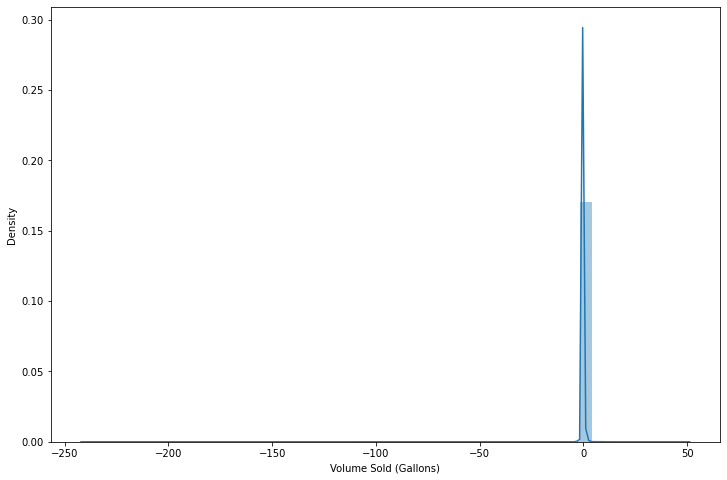

In [48]:
# Ploting the histogram residual plot for test data
import seaborn as sns
fig,ax=plt.subplots(figsize=(12,8))
delta_y1 = y1_test - y_pred1
sns.distplot(delta_y1)

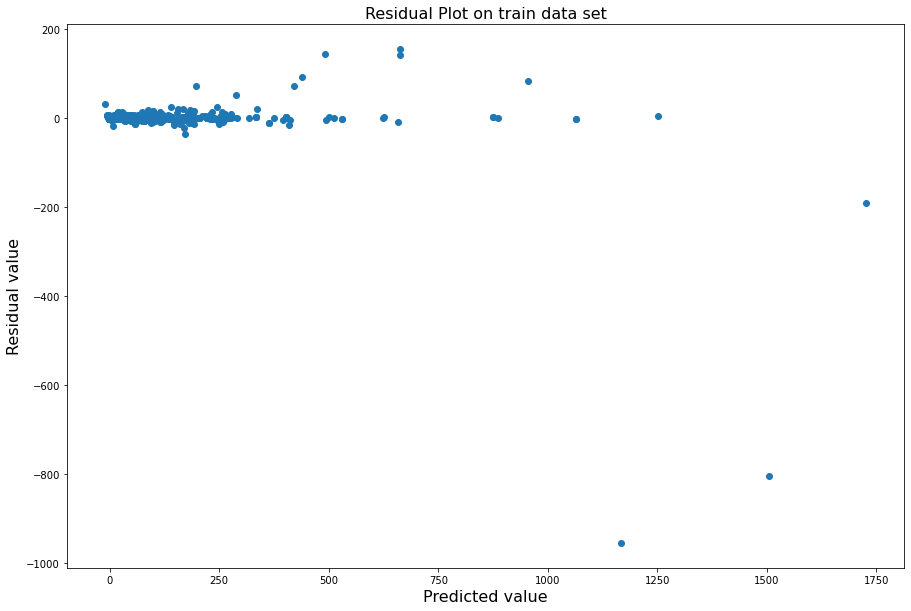

In [49]:
#ploting the residual plot on validation data with the help of scatter plot
plt.figure(figsize=[15,10])
plt.scatter(y_pred2,y_pred2-y1_valid)
plt.xlabel("Predicted value",fontsize=16)
plt.ylabel("Residual value",fontsize=16)
plt.title("Residual Plot on train data set",fontsize=16)
plt.show()

In [50]:
from sklearn import metrics
print("Mean absolute error(MAE) for test data set is ",metrics.mean_absolute_error(y1_test,y_pred1))
print("Mean squared error(MSE) for test data set is ",metrics.mean_squared_error(y1_test,y_pred1))
print("Root mean absolute error(RMSE) for test data set is ",np.sqrt(metrics.mean_squared_error(y1_test,y_pred1)))

Mean absolute error(MAE) for test data set is  0.14480212302975223
Mean squared error(MSE) for test data set is  0.6170813013455062
Root mean absolute error(RMSE) for test data set is  0.7855452255252439
